In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
def skewness_based_on_mean_median(data):
    """
    Calculate skewness based on mean and median.

    """
    mean_val = np.mean(data).round(2)
    median_val = np.median(data).round(2)
    
    skewness = 3 * (mean_val - median_val) / np.std(data)
    print(f"Skewness based on mean {mean_val} and median {median_val} -->  {np.round(skewness, 2)}")
    
    if skewness > 0:
        print(f"The distribution is right-skewed.")
    elif skewness < 0:
        print(f"The distribution is left-skewed.")
    else:
        print(f"The distribution is approximately symmetric.")
    
    return skewness

In [4]:
numerical_features = df.select_dtypes(include=['number']).columns
for nfeat in numerical_features : 
    print (nfeat)
    skewness_based_on_mean_median(df[nfeat])
    print('*'*20)


Age
Skewness based on mean 24.31 and median 22.78 -->  0.72
The distribution is right-skewed.
********************
Height
Skewness based on mean 1.7 and median 1.7 -->  0.0
The distribution is approximately symmetric.
********************
Weight
Skewness based on mean 86.59 and median 83.0 -->  0.41
The distribution is right-skewed.
********************
FCVC
Skewness based on mean 2.42 and median 2.39 -->  0.17
The distribution is right-skewed.
********************
NCP
Skewness based on mean 2.69 and median 3.0 -->  -1.2
The distribution is left-skewed.
********************
CH2O
Skewness based on mean 2.01 and median 2.0 -->  0.05
The distribution is right-skewed.
********************
FAF
Skewness based on mean 1.01 and median 1.0 -->  0.04
The distribution is right-skewed.
********************
TUE
Skewness based on mean 0.66 and median 0.63 -->  0.15
The distribution is right-skewed.
********************


<Axes: >

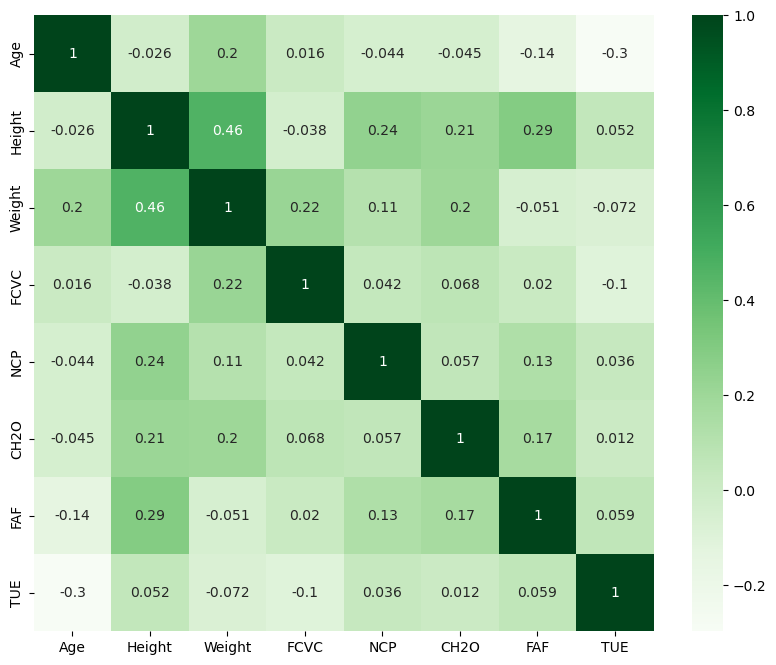

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), cmap="Greens", annot=True)

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


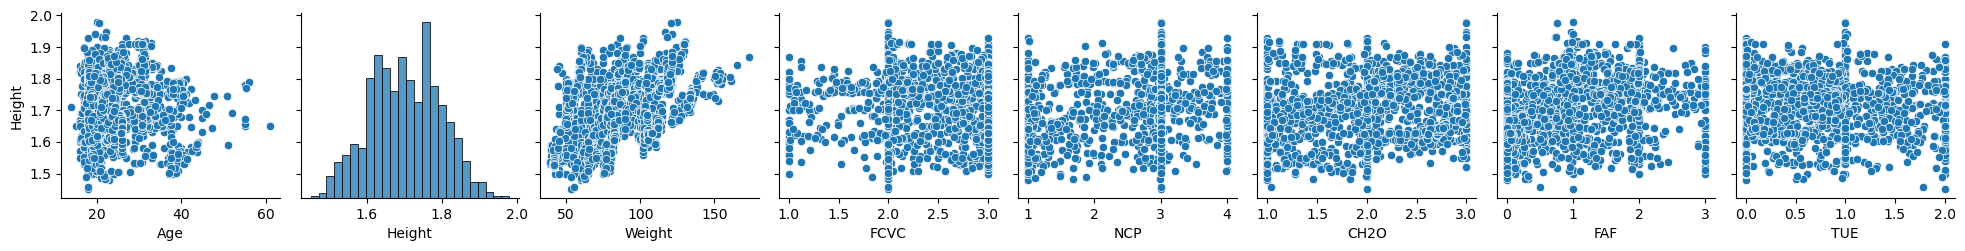

In [6]:
sns.pairplot(df[numerical_features], y_vars='Height')

<Axes: >

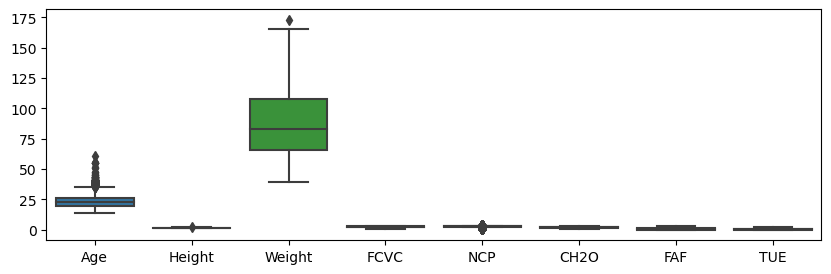

In [7]:
plt.figure(figsize=(10, 3))
sns.boxplot(df[numerical_features], orient='v')

In [8]:
feature = ['FCVC' , 'FAF']
df[feature]

,FCVC,FAF
0,2.0,0.000000
1,3.0,3.000000
2,2.0,2.000000
3,3.0,2.000000
4,2.0,0.000000
...,...,...
2106,3.0,1.676269
2107,3.0,1.341390
2108,3.0,1.414209
2109,3.0,1.139107


In [14]:
scalar = StandardScaler()
df1 = pd.DataFrame(scalar.fit_transform(df[feature]), columns=feature)
df1.head()

,FCVC,FAF
0,-0.785019,-1.188039
1,1.088342,2.339750
2,-0.785019,1.163820
3,1.088342,1.163820
4,-0.785019,-1.188039


In [33]:
linalg.norm(df1.iloc[-1].values)

1.0885075271594917

In [39]:
def calculate_euclidean_distance(data_point1, data_point2):
    distance = np.sqrt(data_point1 -data_point2)**2
    return distance

In [43]:
calculate_euclidean_distance(df1.iloc[0].values[0], df1.iloc[0].values[1]),calculate_euclidean_distance(df1.iloc[-1].values[0], df1.iloc[-1].values[1])


(0.40302040899202457, 1.0693454285689692)

In [ ]:
f1.iloc[0].values

In [10]:
min_max1 = np.array([df1['FCVC'].min(), df1['FCVC'].max()])

In [11]:
min_max2 = np.array([df1['FAF'].min(), df1['FAF'].max()])

In [12]:
from numpy import linalg 

In [60]:
linalg.norm(min_max1) , linalg.norm(min_max2)

(2.8725367744874712, 2.6240936623527)

In [63]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [64]:
original_df = df

In [72]:


# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)  # Hint: Final distance formula calculation step

# Function to predict the label of a new data point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])  # Hint: Calculate distance
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in train_data[:num_neighbors]]  # Hint: Neighbors selection

    output_values = [row[-1] for row in neighbors]
    prediction = Counter(set(output_values), key=output_values.count)  # Hint: Determine majority

    return prediction




In [65]:
original_df['Gender']

0       Female
1       Female
2         Male
3         Male
4         Male
         ...  
2106    Female
2107    Female
2108    Female
2109    Female
2110    Female
Name: Gender, Length: 2111, dtype: object

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

In [69]:
# Encoding the 'Gender' column
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])  # Hint: Fit and apply encoding

# Scaling the features
scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New data point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])
new_data_df

,Gender,Age,Height,Weight
0,Male,32,175,75


In [73]:
# Encoding and scaling the new data point
new_data_df['Gender'] = label_encoder.fit_transform(new_data_df['Gender'])  # Hint: Apply existing encoding
new_data_scaled = scaler.fit_transform(new_data_df[['Age', 'Height', 'Weight']])  # Hint: Apply existing scaling

new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the label
predicted_label = predict_label(original_df, new_data_point, 5)
print(f"The predicted label is: {predicted_label}")

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'int'